In [1]:
# from google.cloud import storage
# import os


# # Authenticate with Google Cloud
# client = storage.Client()

# bucket = client.get_bucket('ml-images-siri')
# blobs = bucket.list_blobs(prefix='Imagesss/')

# # Create new_images folder if it does not exist
# if not os.path.exists('newr_images'):
#     os.makedirs('final3_images')

# for blob in blobs:
#     filename = blob.name.split('/')[-1]
#     local_filepath = os.path.join('final3_images', filename)
#     blob.download_to_filename(local_filepath)
#     print(f'Downloaded {filename} to new_images folder.')


In [2]:
import numpy as np
import cv2
import random
import PIL.Image as Image
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-05-21 02:29:59.806551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 02:30:15.047079: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
# read the csv file into a dataframe
df = pd.read_csv("data.csv")

In [5]:
df

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp
...,...,...,...,...,...
4201,4201,34.078947,Male,0,img_4201.bmp
4202,4202,34.564776,Female,0,img_4202.bmp
4203,4203,27.432362,Female,0,img_4203.bmp
4204,4204,40.492800,Male,0,img_4204.bmp


In [6]:
image_files = os.listdir('./final3_images/')
image_files = list(image_files)

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
df['physical_status'] = np.where(df.name.isin(image_files), 1, 0)

In [10]:
df = df[df.physical_status == 1]

In [11]:
df = df.reset_index(drop = True)

In [12]:
rand_img = [random.randint(0,df.shape[0]-1) for i in range(10)]

In [13]:
import cv2
import os
import random

# set the path to the directory containing the images
image_dir = 'final3_images'

# create a list to store the image data
images = []

# iterate over the image files in the directory
for filename in os.listdir(image_dir):
    # load the image file using OpenCV
    img = cv2.imread(os.path.join(image_dir, filename))
    # convert the image to a NumPy array and append to the list
    images.append(img)

# randomly select 10 images from the list
rand_images = random.sample(images, 10)

# iterate over the list of randomly selected images and display their dimensions
for img in rand_images:
    height, width, channels = img.shape
    print(f"({height}, {width}, {channels})")


(153, 127, 3)
(387, 263, 3)
(684, 629, 3)
(314, 278, 3)
(394, 246, 3)
(220, 169, 3)
(288, 261, 3)
(283, 228, 3)
(225, 213, 3)
(239, 239, 3)


In [14]:
import cv2
import os

# set the path to the directory containing the images
image_dir = 'final3_images/'

# create empty lists to store the image data and target variable
X, y = [], []

# iterate over the rows in the DataFrame
for j in df.index:
    # load the image file using OpenCV
    img = cv2.imread(image_dir + df['name'][j])
    # resize the image to 224x224 pixels using OpenCV
    resized_img = cv2.resize(img, (224, 224))
    # append the resized image and target variable to the X and y lists, respectively
    X.append(resized_img)
    y.append(df['bmi'][j])


In [15]:
X = np.array(X)
y = np.array(y)

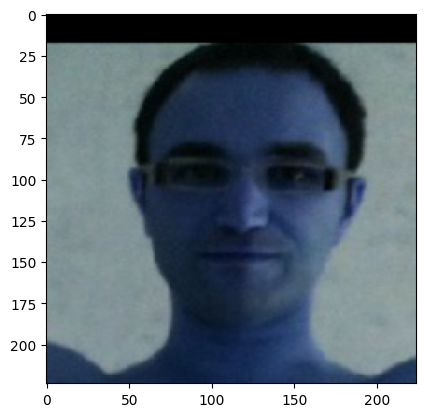

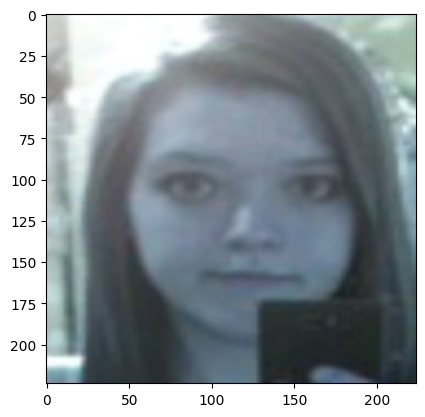

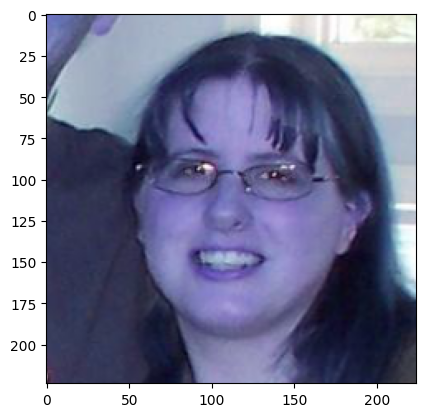

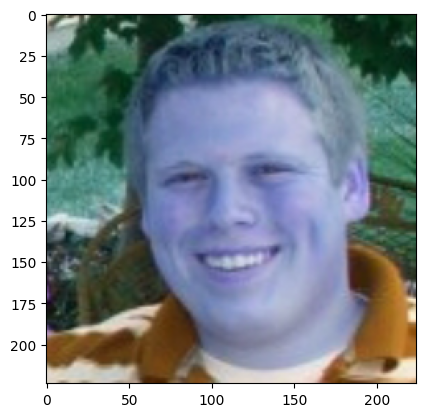

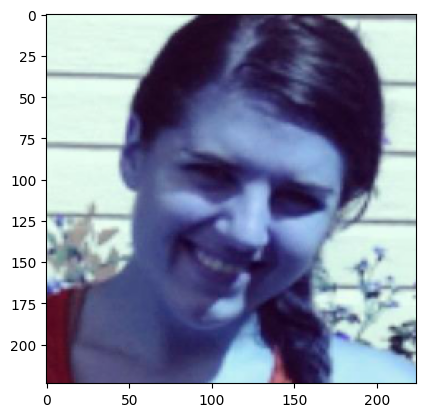

In [16]:
for i in [1,5,2,8,7]:
    plt.imshow(X[i])
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [20]:
train_data_gen = datagen.flow(X_train_scaled, y_train, batch_size=32)

In [21]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
num_classes = 2
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

2023-05-21 02:33:14.257530: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-05-21 02:33:14.257577: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


94765736/94765736 [==============================] - 0s 0us/step


In [22]:
from tensorflow import keras
from tensorflow.keras import layers, models

layer_2d_1 = layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu')
layer_2d_2 = layers.MaxPooling2D(pool_size=(2,2))
layer_2d_3 = layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu')
layer_2d_4 = layers.MaxPooling2D(pool_size=(2,2))
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_layer_1 = layers.Dropout(0.3)
dense_layer_2 = layers.Dense(512, activation='relu')
prediction_layer = layers.Dense(1, activation='linear')

model = models.Sequential([
    layer_2d_1,
    layer_2d_2,
    layer_2d_3,
    layer_2d_4,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    dense_layer_2,
    prediction_layer
])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(
    optimizer='NADAM',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=3, min_lr=1e-6)

callbacks = [es, checkpoint, reduce_lr]

In [24]:
model.fit(train_data_gen, epochs=20)

Epoch 1/20
100/100 [==============================] - 95s 924ms/step - loss: 144.2699 - root_mean_squared_error: 12.0112
Epoch 2/20
100/100 [==============================] - 93s 931ms/step - loss: 85.0044 - root_mean_squared_error: 9.2198
Epoch 3/20
100/100 [==============================] - 95s 943ms/step - loss: 79.0653 - root_mean_squared_error: 8.8919
Epoch 4/20
100/100 [==============================] - 92s 919ms/step - loss: 84.5296 - root_mean_squared_error: 9.1940
Epoch 5/20
100/100 [==============================] - 93s 926ms/step - loss: 78.8834 - root_mean_squared_error: 8.8816
Epoch 6/20
100/100 [==============================] - 93s 925ms/step - loss: 78.6357 - root_mean_squared_error: 8.8677
Epoch 7/20
100/100 [==============================] - 93s 927ms/step - loss: 78.0545 - root_mean_squared_error: 8.8348
Epoch 8/20
100/100 [==============================] - 94s 932ms/step - loss: 74.6561 - root_mean_squared_error: 8.6404
Epoch 9/20
100/100 [==========================

In [25]:
model.evaluate(X_test_scaled, y_test)

25/25 [==============================] - 3s 119ms/step - loss: 121.8991 - root_mean_squared_error: 11.0408


[121.89907836914062, 11.040791511535645]

In [26]:
pred = model.predict(X_test_scaled)

25/25 [==============================] - 3s 120ms/step


Actual BMI: 21.6307692308
Predicted BMI: 23.01216697692871


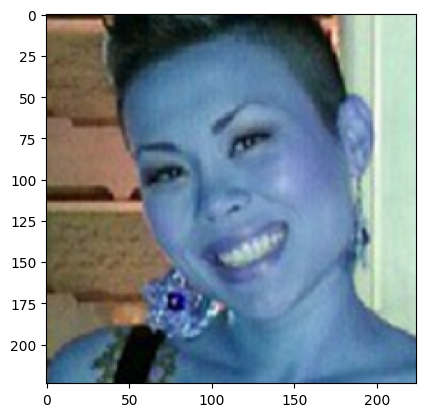

Actual BMI: 26.214159738
Predicted BMI: 24.405424118041992


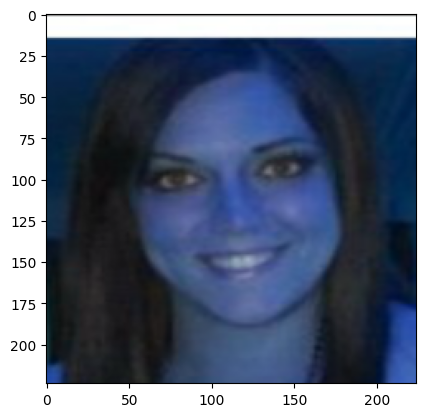

Actual BMI: 23.4010560147
Predicted BMI: 25.948434829711914


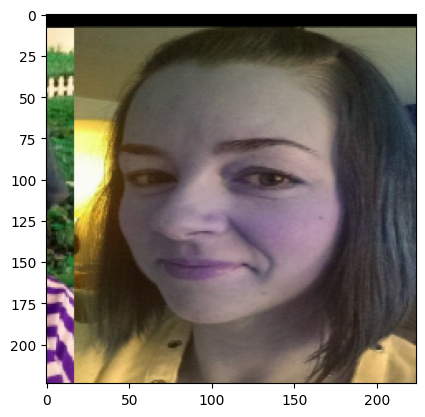

Actual BMI: 22.4945830184
Predicted BMI: 24.988264083862305


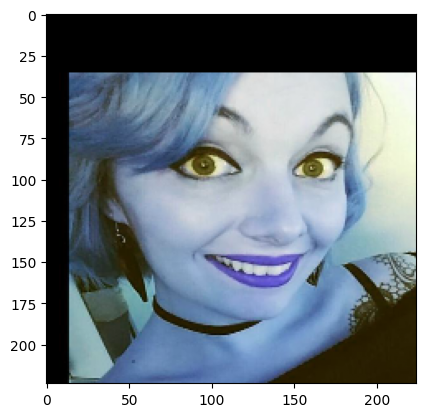

Actual BMI: 23.7316743827
Predicted BMI: 22.391084671020508


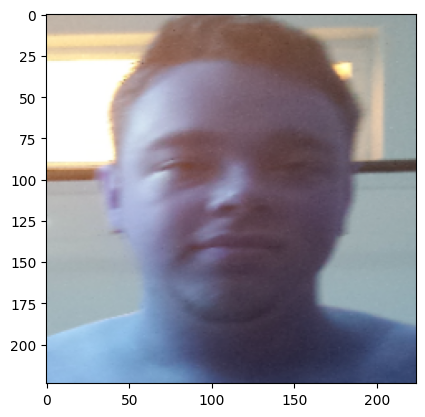

In [27]:
for i in [10,18,8,4,239]:
    print(f'Actual BMI: {y_test[i]}')
    print(f'Predicted BMI: {pred[i][0]}')
    plt.imshow(X_test_scaled[i])
    plt.show()

In [28]:
# # save model
# model.save('model5.h5')
# print("Saved model")

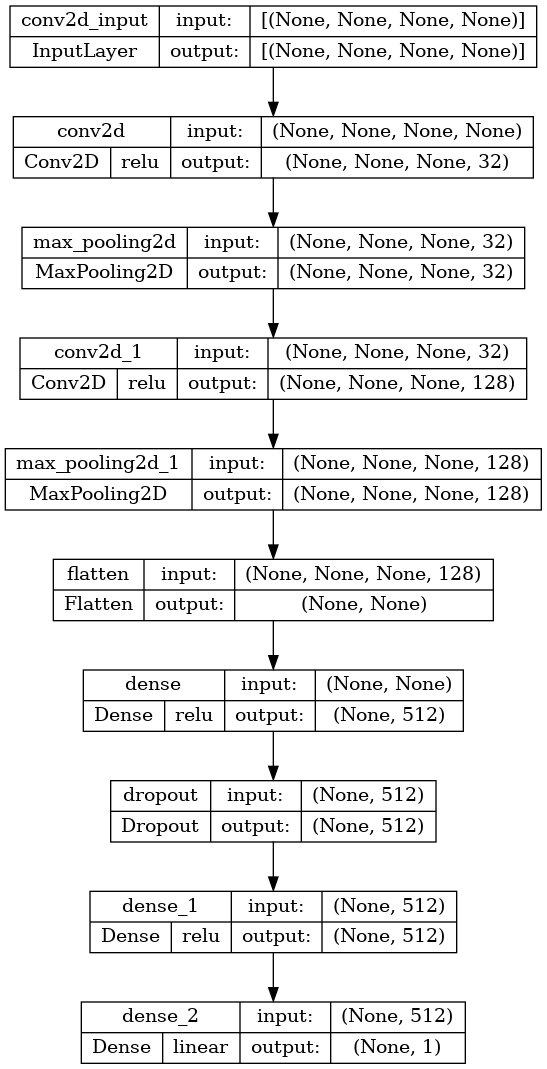

In [29]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_activations=True)